# Naive Bayes Classifier

- Bayes because based on bayes theorem
- Naive because assumes that the features are independent of each other, their order doesn't matter.
- despite it's naiveness, it perfroms fairly well
- Gaussian and Multinomial (commonly used)
- **High** bias
- **Low** variance
- Supervised learning algorithm

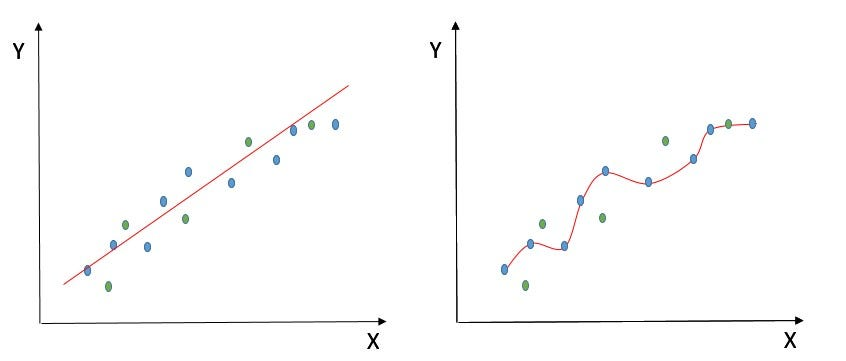

## **Application **
- basically classification tasks
- spam detection
- text classification
- customer segmentation


## **pros**
- simple, fast
- works well with small data
- less prone to overfitting

## **cons**
- assumes features are independent of each other
- sensitive to outliers
- zero frequency problem



In [49]:
# Creating the DataFrame from the given table
data = {
    'Contains \'free\'': [1, 0, 1, 0, 1],
    'Contains \'discount\'': [0, 1, 1, 1, 0],
    'Class': ['spam', 'spam', 'spam', 'not spam', 'not spam'],
    'class_value': [1,1,1,0,0]
}

data= pd.DataFrame(data)
data


,Contains 'free',Contains 'discount',Class,class_value
0,1,0,spam,1
1,0,1,spam,1
2,1,1,spam,1
3,0,1,not spam,0
4,1,0,not spam,0


### **prior probabilities:**

- `p(spam)= 3/5 `
- `p(not spam)= 2/5`

In [52]:
data.drop(["Contains 'discount'"],axis=1)

,Contains 'free',Class,class_value
0,1,spam,1
1,0,spam,1
2,1,spam,1
3,0,not spam,0
4,1,not spam,0


### **conditional probabilities:**

#### for 'free'
- `p(free | spam)= 2/3`

 **by using conditonal probability:**

  `p(free | spam)=  p(free & spam)/ p(spam)`
  
  ->`(2/5)/(3/5)`

  **by using bayes theorem:**

  `p(spam | free) * p(free) / p(spam)`

  -> `((2/3) * (3/5)) / (3/5) = 2/3`





---------------------------------------------------

- `p(free | not spam)= 1/2`

  -> `(1/5)/(2/5)` - conditional probability

In [53]:
data.drop(["Contains 'free'"],axis=1)

,Contains 'discount',Class,class_value
0,0,spam,1
1,1,spam,1
2,1,spam,1
3,1,not spam,0
4,0,not spam,0


### **prior probabilities:**

- `p(spam)= 3/5 `
- `p(not spam)= 2/5`

### **conditional probabilities:**

#### for 'free'
- `p(free | spam)= 2/3`
- `p(free | not spam)= 1/2`


#### for 'discount'

- `p(discount | spam)= 2/3`
- `p(discount | not spam)= 1/2`





- new text which contains 'free' and does not contain 'discount', how will this be classified?

probabilities will be calculated:

- considering it is spam:
- `p(spam | 'free', no 'discount') α p('free', no 'discount' | spam) * p(spam) `
- `p('free', no 'discount' | spam)α p('free' | spam) * ('not discount'| spam)`

here:
- `p(spam)= (3/5)`
- `p('free' | spam) = (2/3)`
- `(no 'discount'| spam) = 1 - ('discount'| spam) = 1 - (2/3)`
-  `p(spam | 'free', no 'discount')  α (3/5) * (2/3) * (1 - (2/3)) = 0.131`

similarly, considering it is not spam:
- `p(not spam | 'free', no 'discount') α p('free', no 'discount' | not spam) * p(not spam)`
- `p(not spam | 'free', no 'discount') α (2/5) * (1/2) * (1 - (1/2)) = 0.1`

comparing probabilities:

- `p(spam | 'free', no 'discount')` is greater than `p(not spam | 'free', no 'discount')`
- as 0.131 > 0.1, so the model will classify it as 'SPAM'

# Applying a model

In [54]:
#  importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



In [32]:
df=pd.read_excel('/content/CreditWorthiness.xlsx', sheet_name='Data')
df

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,6,all settled,second hand vehicle,7710,no savings account,1 to 4 years,1,single male,"yes, guarantor",...,real estate,26,stores,own,1,resident unskilled,2,no,no,good
996,0 <= Rs. < 2000,12,all settled till now,electronics,64560,no savings account,not employed,2,single male,no one,...,Unknown,52,none,own,1,"employed either in management, self or in high...",1,yes,no,bad
997,no checking account,36,dues not paid earlier,electronics,95540,Rs. < 1000,1 to 4 years,2,divorced or separated or married female,no one,...,Other cars etc.,31,stores,own,2,employee with official position,1,no,no,good
998,Rs. >=2000,18,all settled till now,second hand vehicle,19490,Rs. < 1000,more than 7 years,3,divorced or separated or married female,no one,...,Other cars etc.,23,none,own,1,"employed either in management, self or in high...",1,no,no,good


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [35]:
intcols=[x for x in df.columns if df[x].dtypes=='int64']
intcols

['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend']

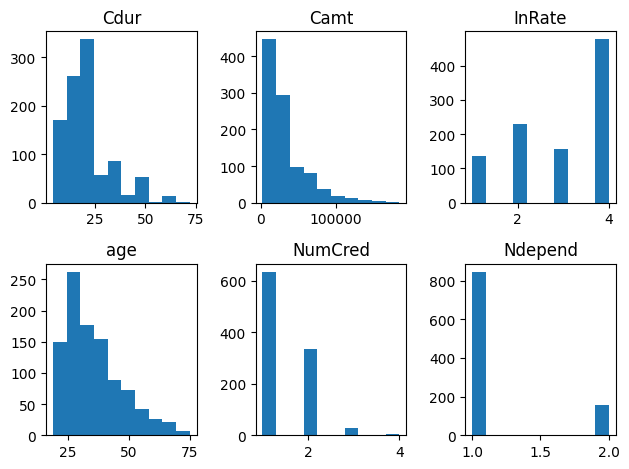

In [37]:
for i, cols in enumerate(intcols):
  plt.subplot(2,3,i+1)
  plt.hist(df[cols])
  plt.title(cols)
plt.tight_layout()

You can treat the above columns for outliers and check its effect on the accuracy of the model.

In [38]:
# Extracting object columns and applying label encoder to them
objcols=[col for col in df.columns if df[col].dtypes=='object']

le={}

for col in objcols:
  le[col]=LabelEncoder()
  df[col]=le[col].fit_transform(df[col])

In [39]:
# Separating target and training variables

x=df.drop('creditScore', axis=1)
y=df['creditScore']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the hyperparameters to search through
params = {'alpha': [0.1, 0.5, 1.0, 2.0],
          'fit_prior': [True, False]}

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Perform grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(mnb, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best cross-validation accuracy:", best_accuracy)


Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best cross-validation accuracy: 0.6275000000000001


In [43]:
# Initializing the Naive Bayes classifier (Gaussian Naive Bayes)
mnb= MultinomialNB(alpha=0.1, fit_prior=True)

# Fitting the classifier on the training data
mnb.fit(x_train, y_train)

# Generating predictions for the test data
pred = mnb.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy of Naive Bayes classifier on the test set: {accuracy}")

Accuracy of Naive Bayes classifier on the test set: 0.655


In [44]:
vals=pd.DataFrame()
vals['actual-values']=y_test
vals['predicted-values']=predictions_larger
vals

,actual-values,predicted-values
77,0,1
297,0,1
142,1,1
583,1,1
395,1,1
...,...,...
7,1,1
613,1,1
491,1,1
651,0,1
